In [19]:
import pandas as pd
df = pd.read_csv("cleaned_attributes.csv", index_col=False)
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,stars,BusinessAcceptsCreditCards,RestaurantsPriceRange2,BikeParking,WiFi,RestaurantsTakeOut,GoodForKids,RestaurantsDelivery,OutdoorSeating,ByAppointmentOnly,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,garage,street,validated,lot,valet,touristy,hipster,romantic,divey,intimate,trendy,upscale,classy,casual
0,4.0,1,2,1,2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4.5,1,2,1,2,1,1,1,1,1,1,1,1,2,0,0,0,1,0,0,0,1,0,0,1,0,1,1
2,3.5,1,2,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1
3,4.0,1,2,1,2,1,1,1,1,1,1,1,1,2,0,1,0,1,0,0,0,0,0,0,0,0,1,1
4,4.0,1,2,1,0,1,1,1,1,1,1,1,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,4.0,1,2,1,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2535,4.0,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0
2536,4.0,1,2,1,2,1,1,1,1,1,1,1,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2537,4.0,1,2,1,2,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [20]:
stars = df.stars
stars.mean()

3.802481291847184

In [23]:
columns = df.columns
for col in columns:
  if (col!="stars"):
    if (df[col].std() == 0):
      df.drop(col, axis=1, inplace=True)
    else:
      df[col] = (df[col] - df[col].mean())/df[col].std() 
df

,stars,RestaurantsPriceRange2,WiFi,Alcohol,garage,street,validated,lot,valet,touristy,hipster,romantic,divey,intimate,trendy,upscale,classy,casual
0,4.0,0.446167,0.667786,-0.143572,2.666275,-0.983786,-0.187204,-1.224102,-0.264435,-0.143144,-0.285962,-0.167105,-0.126491,-0.181496,-0.455868,-0.156866,-0.771762,0.560409
1,4.5,0.446167,0.667786,1.017346,-0.374907,-0.983786,-0.187204,0.816604,-0.264435,-0.143144,-0.285962,5.981890,-0.126491,-0.181496,2.192755,-0.156866,1.295225,0.560409
2,3.5,0.446167,-1.504550,-1.304489,-0.374907,1.016080,5.339665,0.816604,-0.264435,-0.143144,-0.285962,-0.167105,-0.126491,-0.181496,-0.455868,-0.156866,1.295225,0.560409
3,4.0,0.446167,0.667786,1.017346,-0.374907,1.016080,-0.187204,0.816604,-0.264435,-0.143144,-0.285962,-0.167105,-0.126491,-0.181496,-0.455868,-0.156866,1.295225,0.560409
4,4.0,0.446167,-1.504550,1.017346,-0.374907,1.016080,-0.187204,0.816604,-0.264435,-0.143144,-0.285962,-0.167105,-0.126491,-0.181496,-0.455868,-0.156866,-0.771762,0.560409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,4.0,0.446167,-1.504550,-1.304489,-0.374907,-0.983786,-0.187204,0.816604,-0.264435,-0.143144,-0.285962,-0.167105,-0.126491,-0.181496,-0.455868,-0.156866,-0.771762,0.560409
2535,4.0,0.446167,0.667786,-0.143572,2.666275,1.016080,5.339665,-1.224102,-0.264435,-0.143144,-0.285962,-0.167105,-0.126491,-0.181496,-0.455868,-0.156866,1.295225,-1.783708
2536,4.0,0.446167,0.667786,1.017346,-0.374907,-0.983786,-0.187204,0.816604,-0.264435,-0.143144,-0.285962,-0.167105,-0.126491,-0.181496,-0.455868,-0.156866,-0.771762,0.560409
2537,4.0,0.446167,0.667786,-0.143572,-0.374907,1.016080,-0.187204,0.816604,-0.264435,-0.143144,-0.285962,-0.167105,-0.126491,-0.181496,-0.455868,-0.156866,-0.771762,0.560409


In [39]:
dict_cor = dict(df.corr(method ='pearson').stars)
dict_cor.pop("stars")
for w in sorted(dict_cor, key=dict_cor.get, reverse=True):
    print(w, dict_cor[w])

street 0.27855552113894644
classy 0.1900233895270783
trendy 0.15520053555977628
hipster 0.1395649947905612
intimate 0.1000233955949809
romantic 0.07926596330160221
upscale 0.06050682935798718
valet 0.0392640581759162
WiFi 0.035393429143157754
RestaurantsPriceRange2 0.03241455581256218
garage 0.015086594795944276
validated 0.011485046487739832
casual -0.009631453096373858
divey -0.012438348797598586
touristy -0.0400377655696615
Alcohol -0.05637649473197136
lot -0.1042089797218772


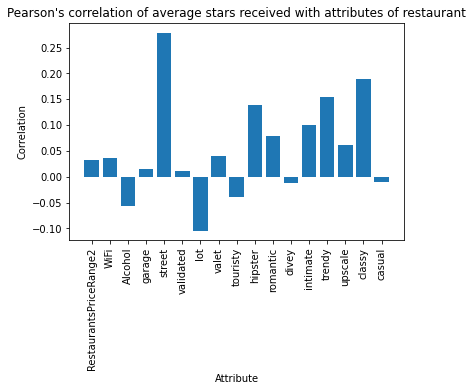

In [55]:
import matplotlib.pyplot as plt

plt.bar(*zip(*dict_cor.items()))
plt.title("Pearson's correlation of average stars received with attributes of restaurant")
plt.xlabel("Attribute")
plt.ylabel("Correlation")
plt.xticks(rotation='vertical')
plt.show()

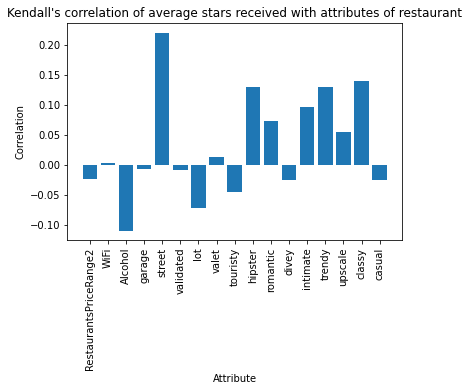

In [56]:
from scipy import stats
dict_ken = dict()
for i in list(df.columns):
  if (i=="stars"):
    continue
  else:
    tau, p_value = stats.kendalltau(list(stars), list(df[i]))
    dict_ken[i] = tau

plt.bar(*zip(*dict_ken.items()))
plt.title("Kendall's correlation of average stars received with attributes of restaurant")
plt.xlabel("Attribute")
plt.ylabel("Correlation")
plt.xticks(rotation='vertical')
plt.show()

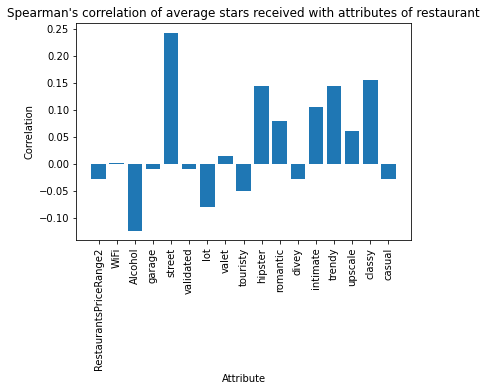

In [57]:
dict_spe = dict()
for i in list(df.columns):
  if (i=="stars"):
    continue
  else:
    tau, p_value = stats.spearmanr(list(stars), list(df[i]))
    dict_spe[i] = tau

plt.bar(*zip(*dict_spe.items()))
plt.title("Spearman's correlation of average stars received with attributes of restaurant")
plt.xlabel("Attribute")
plt.ylabel("Correlation")
plt.xticks(rotation='vertical')
plt.show()

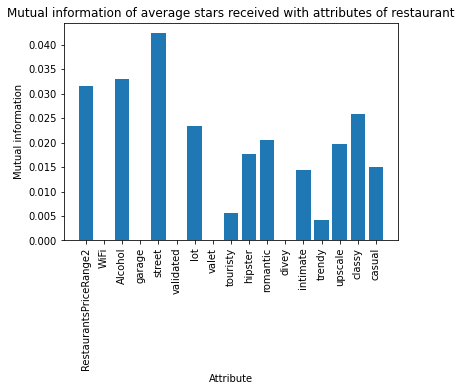

In [72]:
from sklearn.feature_selection import mutual_info_regression
X = df.drop("stars", axis=1).to_numpy()
test = mutual_info_regression(X, stars)
dict_mut = dict(zip(list(df.columns)[1:], test))

plt.bar(*zip(*dict_mut.items()))
plt.title("Mutual information of average stars received with attributes of restaurant")
plt.xlabel("Attribute")
plt.ylabel("Mutual information")
plt.xticks(rotation='vertical')
plt.show()

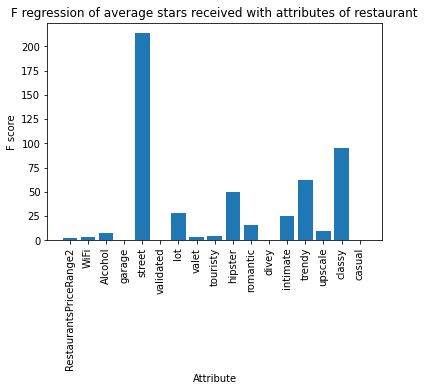

In [77]:
from sklearn.feature_selection import f_regression
X = df.drop("stars", axis=1).to_numpy()
test = f_regression(X, stars)[0]
dict_reg = dict(zip(list(df.columns)[1:], test))
dict_reg

plt.bar(*zip(*dict_reg.items()))
plt.title("F regression of average stars received with attributes of restaurant")
plt.xlabel("Attribute")
plt.ylabel("F score")
plt.xticks(rotation='vertical')
plt.show()